In [1]:
import os
from tqdm import tqdm, tqdm_notebook
import numpy as np
import pandas as pd
from scipy.misc import imread
import matplotlib.pyplot as plt
from math import *
import cv2

In [2]:
data_path = './driving-data/'
test_path = './test-data/'

img_rows, img_cols = 160, 320

In [3]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
driving_log = pd.read_csv(data_path+'driving_log.csv', names=columns)
test_log = pd.read_csv(test_path+'driving_log.csv', names=columns)

In [4]:
steering = driving_log['steering']
steering2 = test_log['steering']

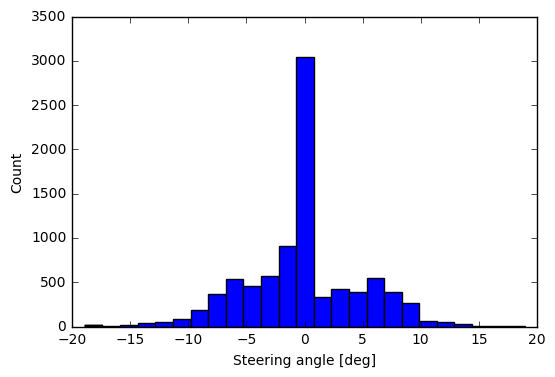

In [5]:
plt.hist(steering*25, bins=25)
plt.xlabel('Steering angle [deg]')
plt.ylabel('Count')
plt.show()

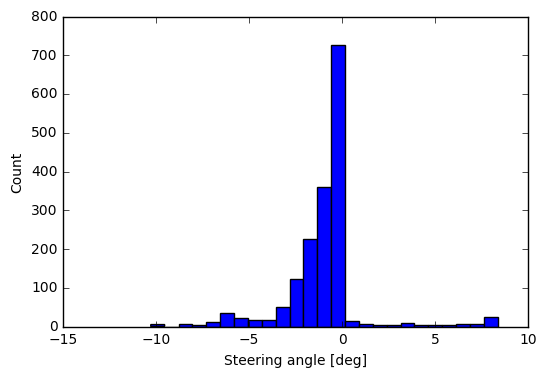

In [6]:
plt.hist(steering2*25, bins=25)
plt.xlabel('Steering angle [deg]')
plt.ylabel('Count')
plt.show()

In [7]:
df = driving_log
nearz = df[abs(df['steering']) < 1/25]
trimmed = df[abs(df['steering']) > .1/25]
left = df[df['steering'] > -2/25]
left = left[left['steering'] < 0]

In [8]:
print(len(trimmed))

6608


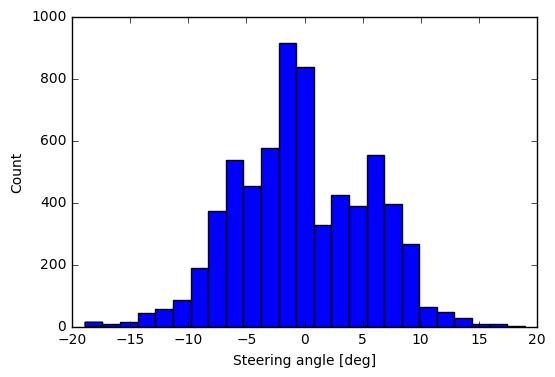

In [9]:
plt.hist(trimmed['steering']*25, bins=25)
plt.xlabel('Steering angle [deg]')
plt.ylabel('Count')
plt.show()

In [55]:
trimmed.to_csv('driving-data/driving_log_trimmed.csv', sep=',', index=False, header=False)

In [24]:
def image_generator(driving_log, data_path, normalizer=255.0, steering_shift=2., steering_max=25.):
    driving_log = driving_log.sample(frac=1).reset_index(drop=True)
    for index, row in driving_log.iterrows():
        fname  = os.path.basename(row['center'])
        fname1 = os.path.basename(row['left'])
        fname2 = os.path.basename(row['right'])
        print(fname)
        # Normalized YUV
        img  = imread(data_path+'IMG/'+fname)#.astype(np.float32)
        img1 = imread(data_path+'IMG/'+fname1)#.astype(np.float32)
        img2 = imread(data_path+'IMG/'+fname2)#.astype(np.float32)
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
#         img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2YUV)
#         img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2YUV)
        
        yield img, np.float32(row['steering'])
        yield img1, np.float32(row['steering'])+steering_shift/steering_max
        yield img2, np.float32(row['steering'])-steering_shift/steering_max
        
#         if abs(np.float32(row['steering'])) > 0.5/25.:
#             yield np.fliplr(img), -np.float32(row['steering'])

In [25]:
img_gen = image_generator(driving_log, 'driving-data/')

(80, 240, 3)


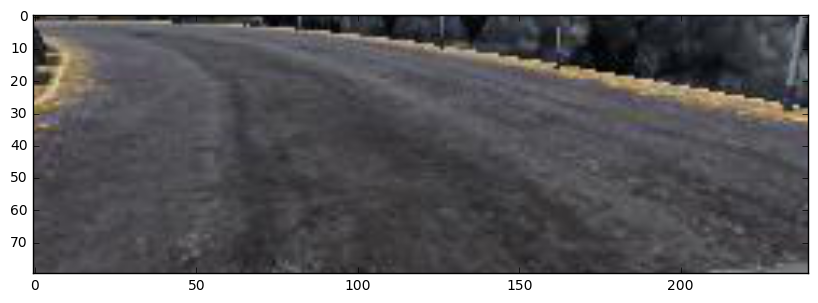

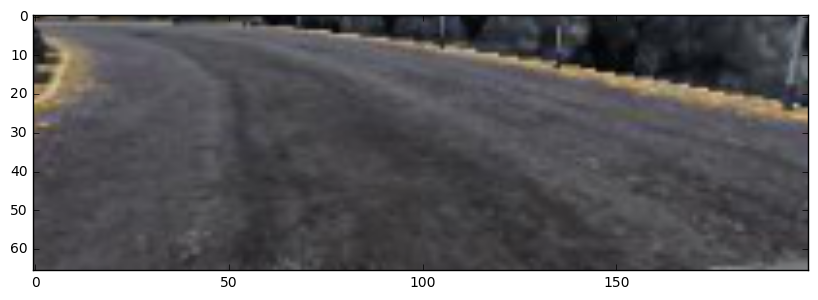

In [53]:
plt.rcParams["figure.figsize"] = (10,10)

# for i in range(16):
#     plt.subplot(4,4,i+1)
img, angle = next(img_gen)

# img = cv2.cvtColor(img, cv2.COLOR_YUV2RGB).astype(np.uint8)
plt.imshow(img[60:140,40:280])
print(img[60:140,40:280].shape)
# plt.xlabel('Steer %.2f' % (angle*25.))
plt.figure()
plt.imshow(cv2.resize(img[60:140,40:280], (200,66)))
# plt.gca().get_xaxis().set_ticks([])
# plt.gca().get_yaxis().set_ticks([])

plt.show()